## 기초데이터과학 (01분반)

## Programming assignment 08

### 1.NYC 온도 데이터 Dataset로 각 문제에 맞게 코드를 작성하세요.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"

# 데이터 불러오기
data = pd.read_csv(url, parse_dates=["Date"])

data_1=data.copy()

# 데이터 확인
print(data.head(5))

        Date  Temp
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8


#### 1-1. 온도 변화를 확인할 수 있도록 선 그래프를 출력하세요.

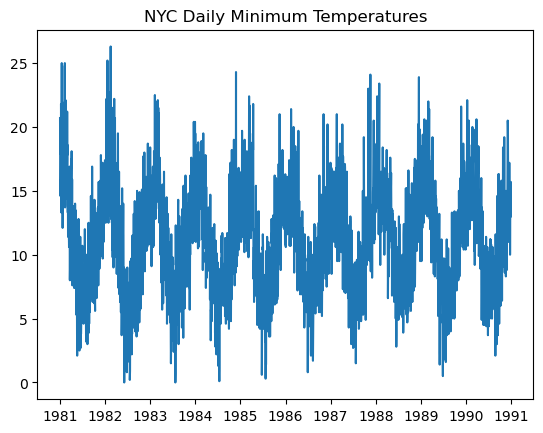

In [2]:
# 날짜별 온도 선 그래프 그리기
Date=data_1['Date']
Temperature=data_1['Temp']

plt.plot(Date,Temperature)

plt.title("NYC Daily Minimum Temperatures")

plt.show()

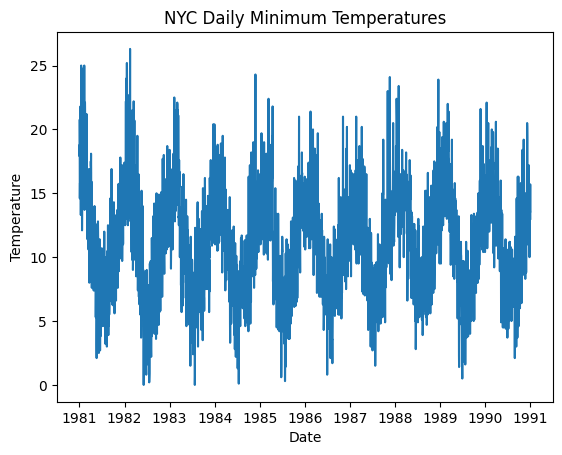

In [8]:
# 이 셀을 실행하지 마시오.

#### 1-2. 데이터셋의 가장 오래된 일과 가장 최신 일 간격을 계산하세요.

In [64]:
# 데이터셋의 기록된 시작 날과 끝나는 날 간격 계산
End=data_1['Date'].max()
Start=data_1['Date'].min()

Duration=End-Start

# 결과 출력
print(f"Start Date: {Start}, End Date: {End}, Duration: {Duration.days} days")  # 뒤에 00:00:00 어떻게 없앨까?

Start Date: 1981-01-01 00:00:00, End Date: 1990-12-31 00:00:00, Duration: 3651 days


#### 1-3. '1985'년 데이터만 추출해서 그래프를 출력하세요.

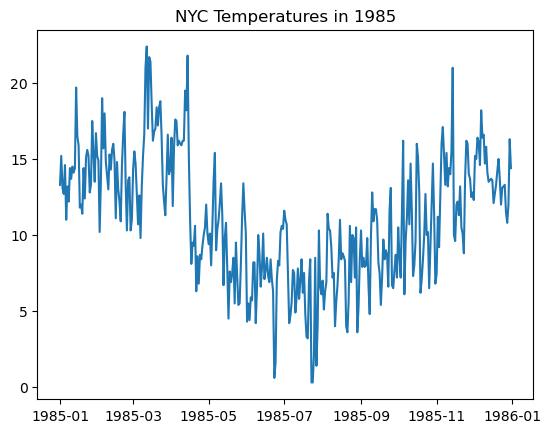

In [ ]:
# 'Date' 속성을 인덱스로 설정
DateIndex=data_1.set_index('Date')

# '1985' 데이터만 추출하여 변수에 저장
Year_1985=DateIndex.loc['1985']

# 선 그래프 출력
plt.plot(Year_1985)

plt.title("NYC Temperatures in 1985")

plt.show()

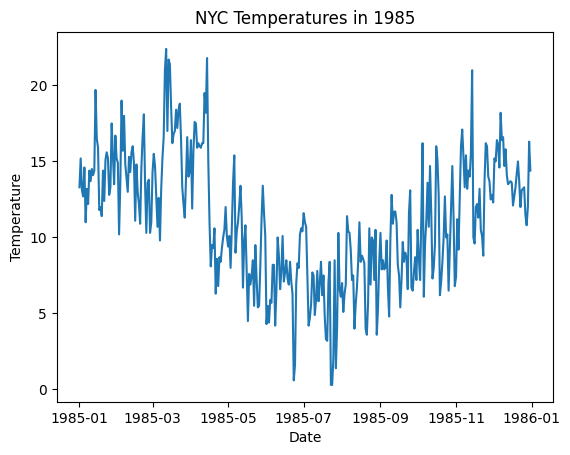

In [10]:
# 이 셀을 실행하지 마시오.

#### 1-4. 데이터셋을 월 주기(매월 말일)로 다운샘플링하여 그래프를 출력하세요.

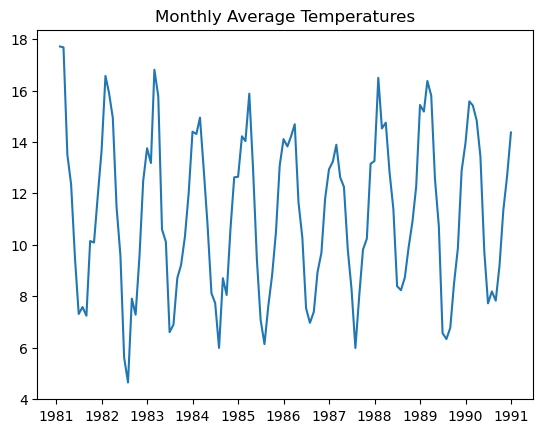

In [6]:
# 매월 말일 기준으로 평균값으로 다운샘플링
M_End=DateIndex.resample('ME').mean()

# 선 그래프 출력
plt.plot(M_End)

plt.title("Monthly Average Temperatures")

plt.show()


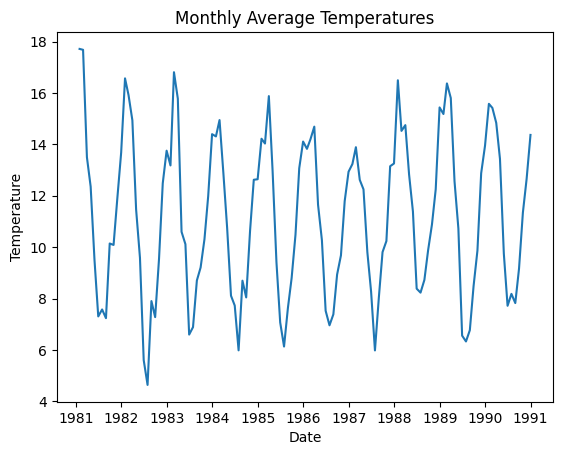

In [11]:
# 이 셀을 실행하지 마시오.

### 2. Our World in Data COVID-19 Dataset로 각 문제에 맞게 코드를 작성하세요.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv("owid-covid-data.csv", parse_dates=["date"])

# 한국 데이터만 저장 (location 컬럼 값이 South Korea인 행만 추출)
country_data = data[data['location'] == 'South Korea']

print(country_data.head(5))

       iso_code continent     location       date  total_cases  new_cases  \
292117      KOR      Asia  South Korea 2020-01-03          NaN        0.0   
292118      KOR      Asia  South Korea 2020-01-04          NaN        0.0   
292119      KOR      Asia  South Korea 2020-01-05          NaN        0.0   
292120      KOR      Asia  South Korea 2020-01-06          NaN        0.0   
292121      KOR      Asia  South Korea 2020-01-07          NaN        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
292117                 NaN           NaN         0.0                  NaN   
292118                 NaN           NaN         0.0                  NaN   
292119                 NaN           NaN         0.0                  NaN   
292120                 NaN           NaN         0.0                  NaN   
292121                 NaN           NaN         0.0                  NaN   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thous

#### 2-1. 한국의 날짜별 신규 확진자 그래프를 그리세요.

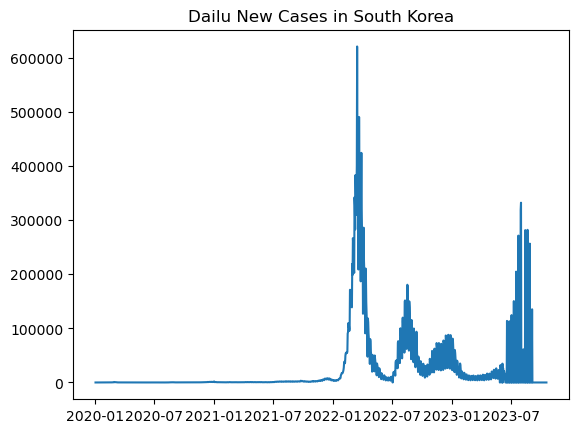

In [67]:
# 데이터셋의 'new_cases' (신규 확진자) 그래프 그리기
plt.plot(country_data['date'],country_data['new_cases'])

plt.title("Dailu New Cases in South Korea")

plt.show()


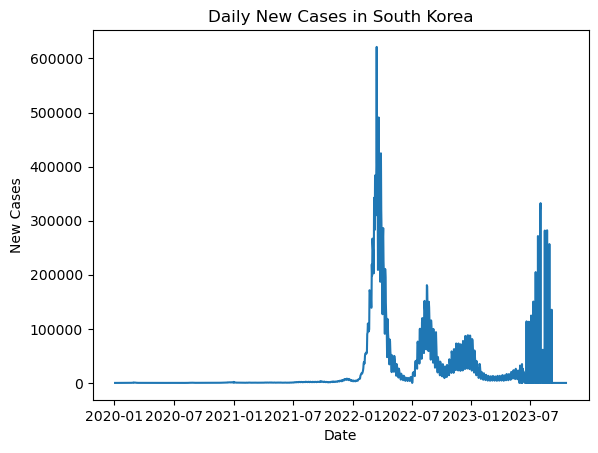

In [39]:
# 이 셀을 실행하지 마시오.

#### 2-2. 코로나 발병 365일부터 730일 사이 신규확진자 수를 계산하세요.

In [68]:
# 기준일로부터 각 date 컬럼 값 차이를 계산하여 ref_date 컬럼으로 저장
copy_country_data=country_data.copy()

copy_country_data['ref_date']=copy_country_data['date']-copy_country_data['date'].min()

# 'ref_date' 컬럼을 인덱스로 설정
copy_country_data.index=copy_country_data['ref_date']     # RefDateIndex=copy_country_data.set_index('ref_date')

# '365 day'부터 '730 day'까지 신규 확진자 수의 합계 계산
total_new_case=copy_country_data['new_cases'].loc['365 days':'730 days'].sum()

# 결과 출력
print("Total cases from 365 day to 730 day : ",total_new_case)

Total cases from 365 day to 730 day :  579628.0


#### 2-3. 2022년 3월 신규 확진자 수를 그래프로 출력하세요.

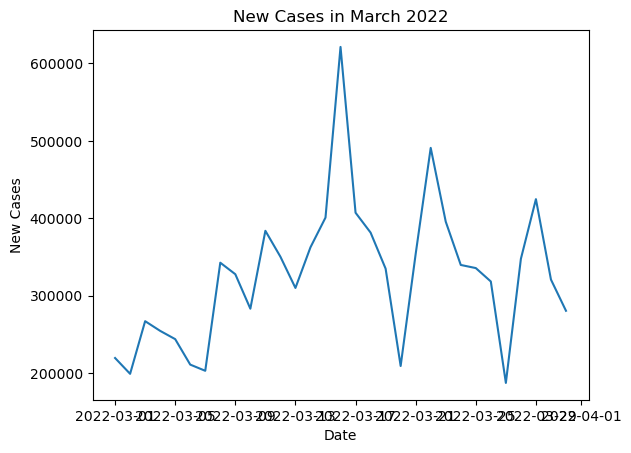

In [69]:
# date 컬럼을 인덱스로 설정하고 '2022-03' 데이터 추출
copy_country_data_Index=copy_country_data.set_index('date')
country_data_2022m03=copy_country_data_Index.loc['2022-03']

# 그래프 출력
plt.plot(country_data_2022m03['new_cases'])

plt.title('New Cases in March 2022')
plt.xlabel('Date')
plt.ylabel('New Cases')

plt.show()


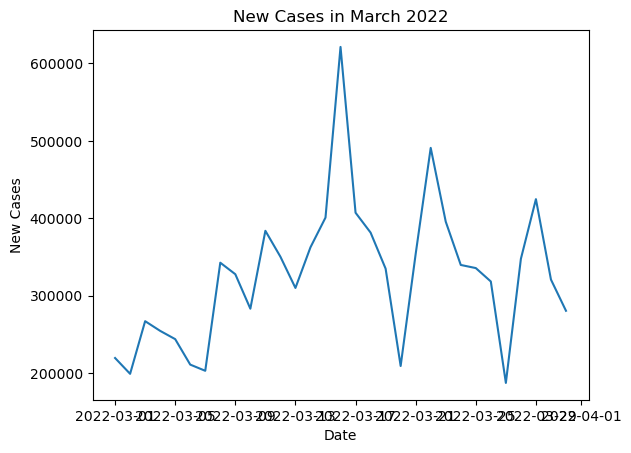

In [44]:
# 이 셀을 실행하지 마시오.

#### 2-4. 데이터셋을 주별 신규 확진자 합계로 다운샘플링하여 그래프를 출력하세요.

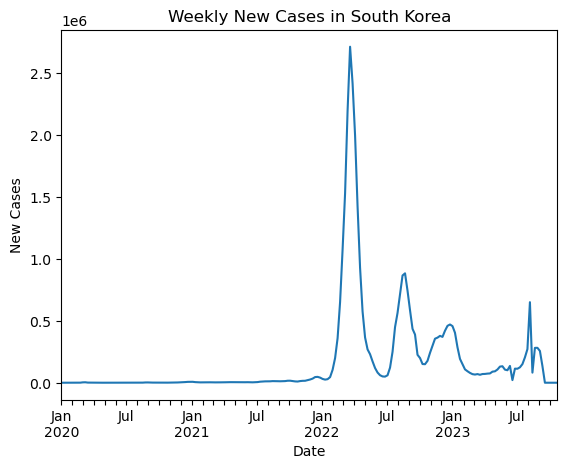

In [85]:
# 리샘플링 (주별 신규 확진자 합계)
weekly=copy_country_data_Index.resample('W').sum()

# 그래프 출력
plt.figure() # 표 크기 기본값
plt.plot(weekly.index, weekly['new_cases'])

start_date = weekly.index.min().replace(day=1)
all_months = pd.date_range(start=start_date, end=weekly.index.max(), freq='MS')

labels = []
for d in all_months:
    if d.month == 1:
        # 1월인 경우: Jan과 연도를 줄바꿈하여 표시 (예: Jan\n2020)
        labels.append(d.strftime('Jan\n%Y'))
    elif d.month == 7:
        # 7월인 경우: Jul만 표시
        labels.append('Jul')
    else:
        # 나머지 달: 빈 문자열 (눈금만 표시됨)
        labels.append("")

plt.xticks(ticks=all_months, labels=labels)

plt.xlim([start_date, weekly.index.max()])

plt.title("Weekly New Cases in South Korea")
plt.xlabel("Date")
plt.ylabel("New Cases")

plt.show()


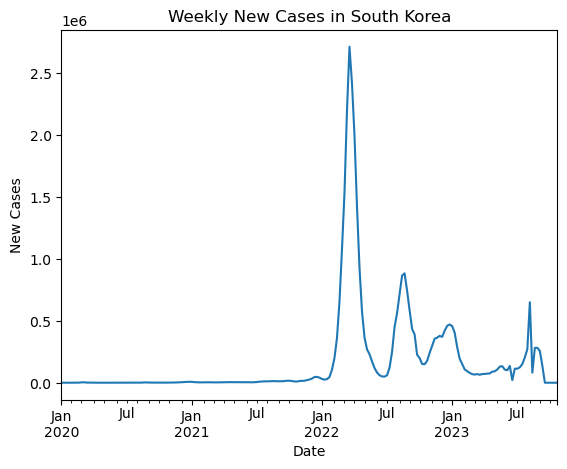

In [46]:
# 이 셀을 실행하지 마시오.

### 3. Bitcoin Historical Dataset로 각 문제에 맞게 코드를 작성하세요.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
url = "https://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_d.csv"
data = pd.read_csv(url, skiprows=1, parse_dates=["Date"])

print(data.head(5))

            Unix       Date   Symbol      Open      High       Low     Close  \
0  1764374400000 2025-11-29  BTCUSDT  90890.71  91165.65  90155.47  90802.44   
1  1764288000000 2025-11-28  BTCUSDT  91333.94  93092.00  90180.63  90890.70   
2  1764201600000 2025-11-27  BTCUSDT  90484.01  91950.00  90089.91  91333.95   
3  1764115200000 2025-11-26  BTCUSDT  87369.97  90656.08  86306.77  90484.02   
4  1764028800000 2025-11-25  BTCUSDT  88300.01  88519.99  86116.00  87369.96   

    Volume BTC   Volume USDT  tradecount  
0   7429.88291  6.737257e+08     1677860  
1  18830.86012  1.721418e+09     4229754  
2  16833.50932  1.535778e+09     3920172  
3  21675.82239  1.916852e+09     4668280  
4  19567.04110  1.708989e+09     4838747  


#### 3-1. 비트 코인의 일별 종가 그래프를 그리세요.

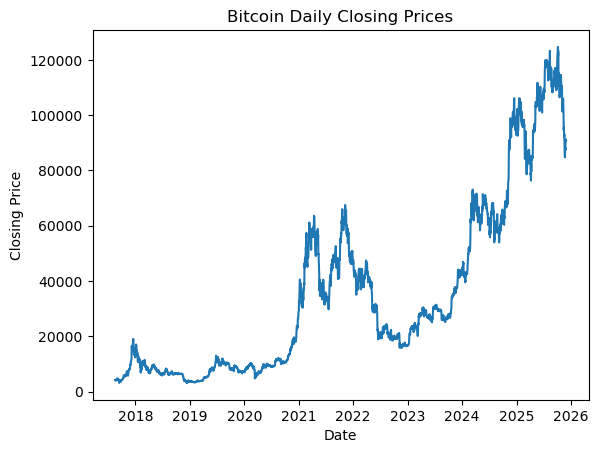

In [3]:
# 데이터셋의 'Close' (일별 종가) 속성 그래프 그리기
Copy_Bit_data=data.copy()

Close=Copy_Bit_data['Close']
Date_3=Copy_Bit_data['Date']

plt.plot(Date_3,Close)
plt.title("Bitcoin Daily Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")

plt.show()

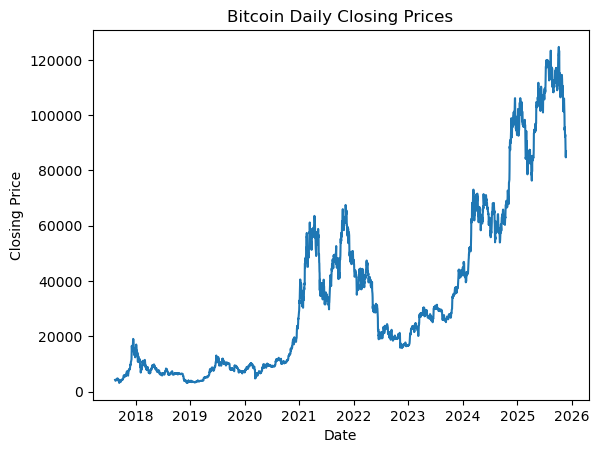

In [11]:
# 이 셀을 실행하지 마시오.

#### 3-2. 비트 코인 데이터셋에서 가장 높은 종가가 발생한 날짜를 출력하세요.

In [4]:
# 가장 높은 종가가 발생한 날짜 찾기
Close_max=Close.max()
Date_Cl_max=pd.to_datetime(Copy_Bit_data[Copy_Bit_data['Close']==Close_max]['Date'].values[0])

# 결과 출력
print("Highest Close Price Date:",Date_Cl_max)      #왜 안 되나

Highest Close Price Date: 2025-10-06 00:00:00


#### 3-3. 2022년의 일별 종가 그래프를 출력하세요.

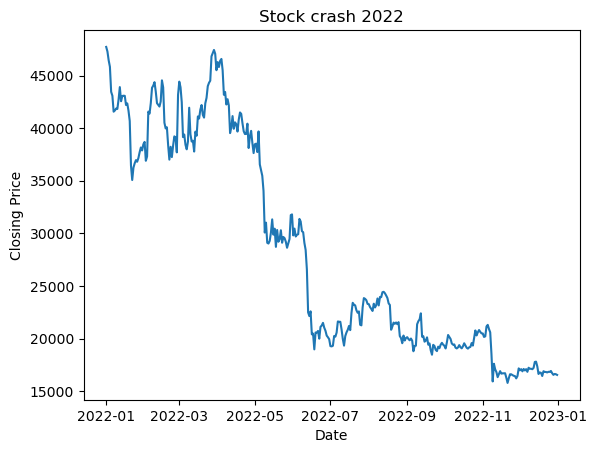

In [5]:
# 시간 인덱스를 'Date'로 설정하고 '2022' 추출
CBitIndex=Copy_Bit_data.set_index('Date')

CBit_2022=CBitIndex.loc['2022']
# 2022년의 'Close' (일별 종가) 그래프 출력
plt.plot(CBit_2022['Close'])

plt.title("Stock crash 2022")
plt.xlabel("Date")
plt.ylabel("Closing Price")

plt.show()

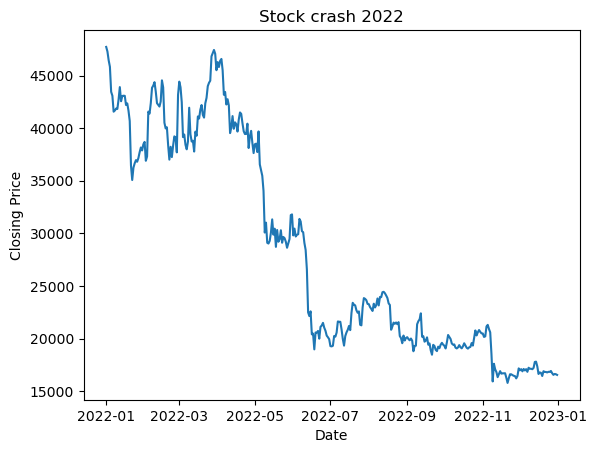

In [14]:
# 이 셀을 실행하지 마시오.

#### 3-4. 데이터셋을 월 주기(매월 1일)로 다운샘플링하여 그래프를 출력하세요.

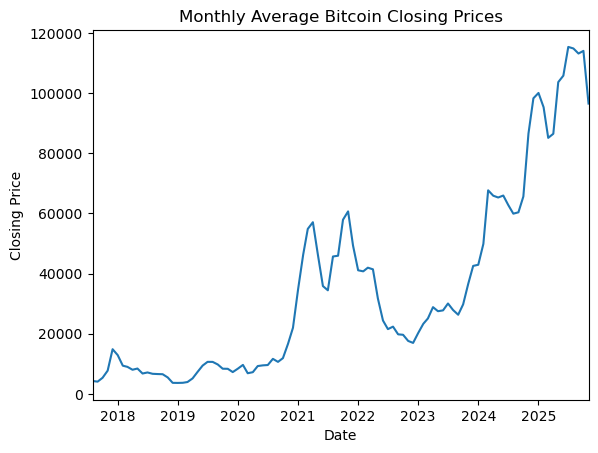

In [15]:
# 매월 1일 기준으로 평균값으로 다운샘플링
down3_4=CBitIndex['Close'].resample('MS').mean()

# 그래프 출력
plt.plot(down3_4)

plt.title("Monthly Average Bitcoin Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")

plt.xlim(down3_4.index.min(),down3_4.index.max())

plt.show()


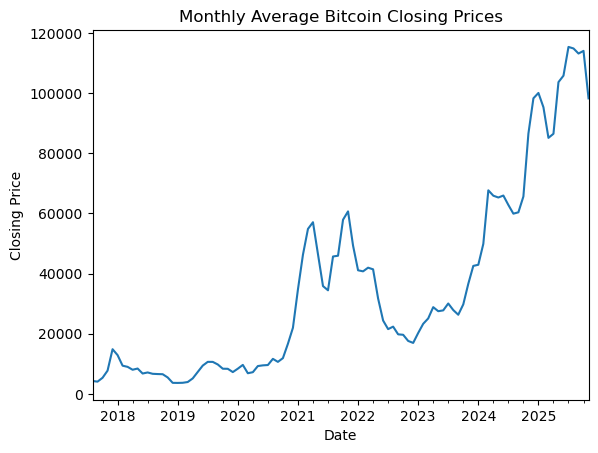

In [15]:
# 이 셀을 실행하지 마시오.

### 4. European Central Bank Exchange Rate Dataset로 각 문제에 맞게 코드를 작성하세요.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv("eurofxref-hist.csv")

print(data.head(5))

         Date     USD     JPY     BGN  CYP     CZK     DKK      EEK      GBP  \
0  2010-02-14  2.0000    1.00  2.0000  NaN   1.000  2.0000   1.0000   2.0000   
1  2010-02-12  5.0000    6.00  7.0000  NaN   8.000  9.0000  10.0000  11.0000   
2  2010-02-10  1.3740  123.01  1.9558  NaN  26.108  7.4449  15.6466   0.8798   
3  2010-02-09  1.3760  123.40  1.9558  NaN  26.099  7.4448  15.6466   0.8804   
4  2010-02-08  1.3675  122.07  1.9558  NaN  26.168  7.4442  15.6466   0.8761   

      HUF  ...       IDR     INR      KRW      MXN      MYR      NZD     PHP  \
0    1.00  ...      1.50   1.600     1.70   1.8000   1.9000   2.1000   2.200   
1   12.00  ...     28.00  29.000    30.00  31.0000  32.0000  33.0000  34.000   
2  271.55  ...  12871.34  63.884  1591.64  17.9438   4.7149   1.9827  63.800   
3  272.00  ...  12878.09  64.197  1601.45  18.0645   4.7235   1.9877  63.836   
4  273.90  ...  12861.76  64.013  1602.60  18.0130   4.7063   1.9914  63.705   

       SGD     THB      ZAR  
0   2.30

#### 4-1. 유로 달러 환율 그래프를 출력하세요.

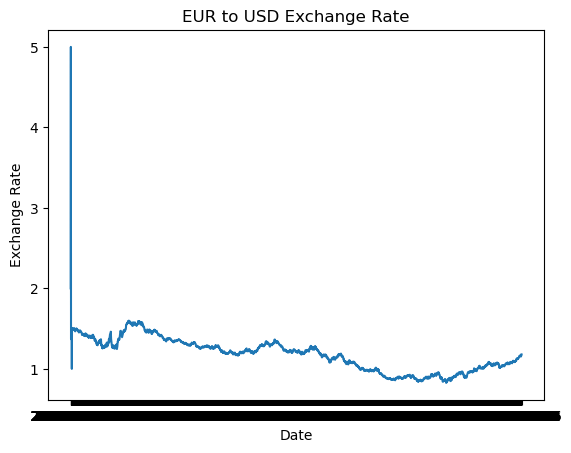

In [36]:
# 'USD' (달러) 속성에 대한 그래프 출력
data_4=data.copy()

plt.plot(data_4['Date'],data_4['USD'])
plt.title("EUR to USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")

plt.show()

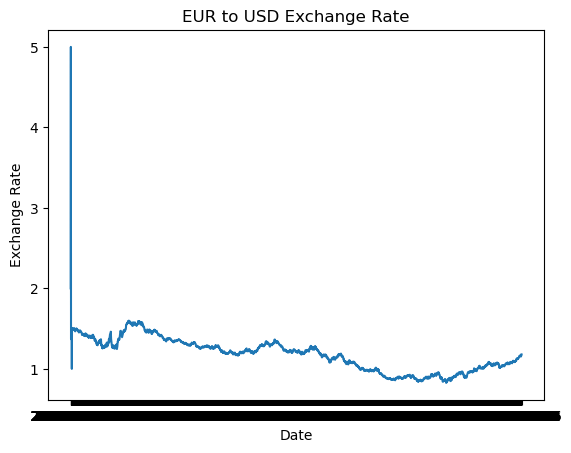

In [20]:
# 이 셀을 실행하지 마시오.

#### 4-2. 환율 데이터의 가장 오래된 날짜와 최신 날짜를 출력하고, 두 날짜 간의 시간 간격(일 수)을 계산하세요.

In [52]:
# 'Date' 속성을 datetime 객체로 변환
data_4['Date']=pd.to_datetime(data_4['Date'])

# 데이터셋의 기록된 시작 날과 끝나는 날 간격 계산
End_4=data_4['Date'].max()
Start_4=data_4['Date'].min()

Duration_4=End_4-Start_4
# 결과 출력
print("Start Date:",Start_4,"End date:",End_4,"Duration:",Duration_4)

Start Date: 1999-01-05 00:00:00 End date: 2010-02-14 00:00:00 Duration: 4058 days 00:00:00


#### 4-3. 2010년 1월의 엔화 데이터를 그래프로 출력하세요.

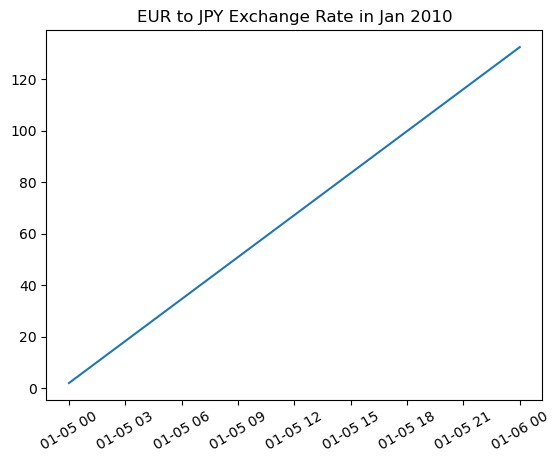

In [57]:
# Date 컬럼을 인덱스로 설정
data_4_Index=data_4.set_index('Date')

# 2010년 1월 데이터 추출
data_4_Index_2010m1=data_4_Index.loc['2010-01']

# 'JPY' 속성에 대한 그래프 출력
plt.plot(data_4_Index_2010m1['JPY'])
plt.title("EUR to JPY Exchange Rate in Jan 2010")

plt.xticks(rotation=30)

plt.show()

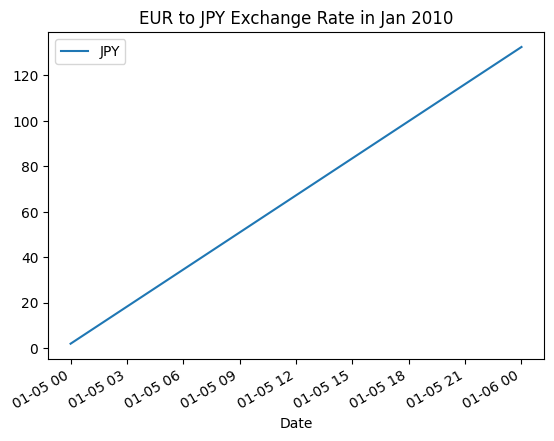

In [ ]:
# 이 셀을 실행하지 마시오.

#### 4-4. USD 컬럼의 데이터를 시간 단위로 업샘플링하고, 보간법(interpolation)을 사용하여 결측값을 채운 데이터를 그래프를 그려 시각화하세요.

C:\Users\wnsrb\AppData\Local\Temp\ipykernel_17668\2013764675.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  up_USD=data_4_Index['USD'].resample('H').asfreq()


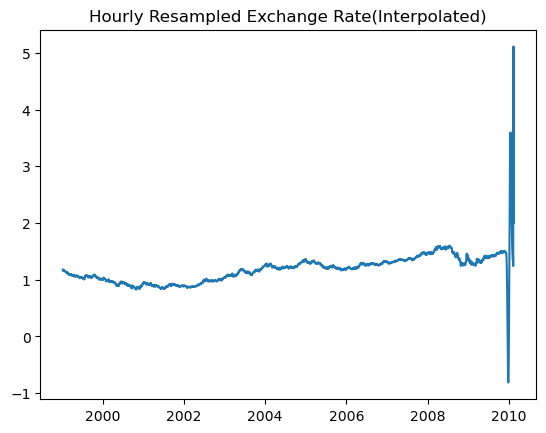

In [55]:
# 'USD' 속성에 대해 업샘플링 (시간 단위) 및 'polynomial' (다항식 보간법) 적용 (order=2)
up_USD=data_4_Index['USD'].resample('H').asfreq()
pol_upUSD=up_USD.interpolate(method='polynomial',order=2)

# 그래프 출력
plt.plot(pol_upUSD)
plt.title("Hourly Resampled Exchange Rate(Interpolated)")

plt.show()

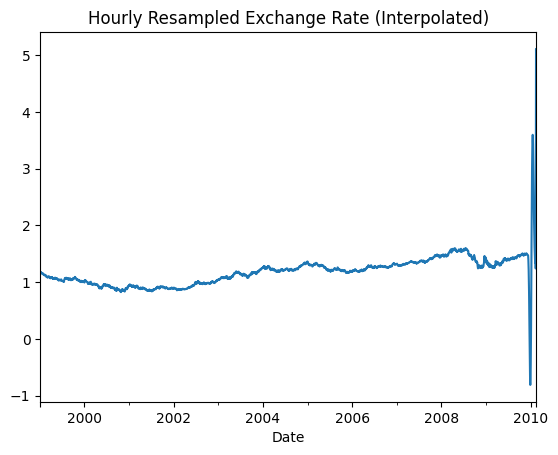

In [ ]:
# 이 셀을 실행하지 마시오.

####